# Exploratory Data Analysis 

## Loading data 

### Imports

In [1]:
from google.auth import load_credentials_from_file
from google.cloud.bigquery import Client
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
sns.set_theme()

### BigQuery credential setup 

In [3]:
# acessing bigquery redentials from local file 
credentials, project_id = load_credentials_from_file('service_account.json')

In [4]:
# Load data from BigQuery
client = Client(
    project = project_id,
    credentials=credentials
)

In [5]:
# listing tables 
database_id = "music_data"
tables = client.list_tables(database_id)

print(f"Tables contained in '{database_id}':")
for table in tables:
    print(f"{table.project}.{table.dataset_id}.{table.table_id}")

Tables contained in 'music_data':
da26-python.music_data.artists
da26-python.music_data.audio_features
da26-python.music_data.chart_positions
da26-python.music_data.tracks
da26-python.music_data.tracks_artists_mapping


In [6]:
# creating a data loading function 
def load_data(table): 
    # selecting table
    query = f"SELECT * FROM `da26-python.music_data.{table}`" 
    # creating query job and transforming to dataframe  
    load_job = client.query(query)
    data = load_job.to_dataframe() 
    # return dataframe 
    return data

### Loading data from BigQuery

#### Load artist data

In [7]:
# loading artist table 
artists = load_data('artists')

/opt/anaconda3/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [8]:
artists.head()

,artist_id,name,popularity,followers
0,13UwRaADQI0yTqjPBDkk6d,J-Shin (Featuring LaTocha Scott of Xscape),0,253
1,2LmsYeN3MzzZ9zhuZhNyqO,A*Teens,0,10
2,5Q25oFANw7zA3kD2DPaJ8D,The 2000s Karaoke Band,0,26
3,7u7ORV6MVjId1jfJwMdakL,2000s Karaoke Band,0,27
4,0LyfQWJT6nXafLPZqxe9Of,Various Artists,0,2542450


#### Load audio features data

In [9]:
# loading audio_features table 
audio_features = load_data('audio_features')

/opt/anaconda3/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [10]:
audio_features.sample(5)

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
879,0oVWPlnK5eAqnJCVB0FvpP,0.565,0.541,9.0,-8.427,1.0,0.0376,0.19300,0.000004,0.0582,0.225,82.006,4.0
5741,6iF4RgIjDvDqyW13PezSj3,0.610,0.571,2.0,-5.649,1.0,0.0782,0.00863,0.000000,0.1310,0.747,105.010,4.0
6150,2e9EZ2V5QGGZPMJacO3y0Y,0.705,0.702,0.0,-4.783,0.0,0.1080,0.13800,0.000000,0.3640,0.771,140.059,4.0
9901,06s3QtMJVXw1AJX3UfvZG1,0.691,0.765,8.0,-4.727,1.0,0.1110,0.46400,0.000003,0.2030,0.855,174.021,4.0
9757,29VphGf9Vgmvj9OBFOHZWh,0.828,0.749,9.0,-7.554,1.0,0.0556,0.09420,0.000171,0.1140,0.953,115.053,4.0


#### Load chart positions data

In [11]:
# loading chart_positions table 
chart_positions = load_data('chart_positions')

/opt/anaconda3/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [12]:
chart_positions.head()

,chart_week,list_position,track_id
0,2021-07-10,42,000TJlEJQ3nafsm1hBWpoj
1,2003-07-19,60,003FTlCpBTM4eSqYSWPv4H
2,2003-07-26,60,003FTlCpBTM4eSqYSWPv4H
3,2003-08-02,64,003FTlCpBTM4eSqYSWPv4H
4,2003-07-12,66,003FTlCpBTM4eSqYSWPv4H


#### Load tracks data

In [13]:
# loading tracks table 
tracks = load_data('tracks')

/opt/anaconda3/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [14]:
tracks.head()

,track_id,name,duration_ms,release_date,album_type,explicit
0,5CMVGP24paZIukljDj0iWc,Jingle Bells (with The Ken Lane Singers),156666,1945,compilation,False
1,25leEEaz1gIpp7o21Fqyjo,Here Comes Santa Claus (Right Down Santa Claus...,150266,1947,album,False
2,1dtIaSlyrLI04sqYa8nLyN,Rudolph the Red-Nosed Reindeer,186733,1947,album,False
3,4PS1e8f2LvuTFgUs1Cn3ON,The Christmas Song (Merry Christmas To You),192160,1962,album,False
4,4PS1e8f2LvuTFgUs1Cn3ON,The Christmas Song (Merry Christmas To You),192160,1962,album,False


#### Load tracks artists mapping data

In [15]:
# loading tracks_artists_mapping table 
tracks_artists_mapping = load_data('tracks_artists_mapping')

/opt/anaconda3/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [16]:
tracks_artists_mapping.head()

,artist_id,track_id
0,artist_id,track_id
1,00FQb4jTyendYWaN8pK0wa,4zmKGsrXjLmljb5fTaBTot
2,00FQb4jTyendYWaN8pK0wa,6GGtHZgBycCgGBUhZo81xe
3,00FQb4jTyendYWaN8pK0wa,22DH8NChecsgPxDjA4pqer
4,00FQb4jTyendYWaN8pK0wa,7JVNRVPeXFAOdMrxOHNjVv


## Inital inspection 

### Artists 

In [17]:
# inital inspection
artists.sample(10)

,artist_id,name,popularity,followers
652,3wagsd3wjqjNVlMLPudipm,Rumi Carter,44,4343
1964,6WLvgbfYXQPO396oJEYCsi,Macklemore & Ryan Lewis,64,11525
2715,0ECwFtbIWEVNwjlrfc6xoL,Eagles,77,11043312
517,2GzDtAvFxH5TXQdU49DfBJ,Ali Tabatabaee,39,2122
203,77BL4malNaiSH99GMNvOka,Blaine Larsen,23,32364
308,1E2yfiKaUFBKGIFxdv2xTD,Amy Irving,30,1419
1240,14qypx78D3Jd1mm7c2BqQb,T-Shyne,54,15623
723,4jpsw9CQS439N0B7SecMgf,Ant Saunders,45,86284
805,20apXQGKM00jJTvYfyKwlb,Maino,47,196863
893,4hqDqHtBlgxXpLXVYf7c8L,Ashlee Simpson,49,978944


In [18]:
# checking dtypes, number of rows and number of null values 
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3108 entries, 0 to 3107
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   artist_id   3108 non-null   object
 1   name        3108 non-null   object
 2   popularity  3108 non-null   Int64 
 3   followers   3108 non-null   Int64 
dtypes: Int64(2), object(2)
memory usage: 103.3+ KB


In [19]:
# checking for duplicated rows 
artists.duplicated().sum()

0

In [20]:
# checking number of unique values 
artists['name'].nunique()

3101

In [21]:
# checking max value in popularity
artists['popularity'].max()

100

In [22]:
# checking min value in popularity
artists['popularity'].min()

0

In [23]:
# checking max value in followers
artists['followers'].max()

123544806

In [24]:
# checking min value in followers
artists['followers'].min()

5

In [25]:
artists.head(10)

,artist_id,name,popularity,followers
0,13UwRaADQI0yTqjPBDkk6d,J-Shin (Featuring LaTocha Scott of Xscape),0,253
1,2LmsYeN3MzzZ9zhuZhNyqO,A*Teens,0,10
2,5Q25oFANw7zA3kD2DPaJ8D,The 2000s Karaoke Band,0,26
3,7u7ORV6MVjId1jfJwMdakL,2000s Karaoke Band,0,27
4,0LyfQWJT6nXafLPZqxe9Of,Various Artists,0,2542450
5,0sghswo09Y90G2q0eha4SW,Joe Osborne,0,23
6,14qvHyl1HApvsMrtxXljMM,Archuleta Maroon,0,21
7,1b9wvEcR1vuxoVu6isElSd,Anand Clique,0,109
8,5lfsewMdyn5f9okNcLUtYM,Xander Phillips,0,79
9,0o9FGMZT1bOTSGYFb7BoWz,Drop That Thun Thun,0,250


In [26]:
artists.tail(10)

,artist_id,name,popularity,followers
3098,7dGJo4pcD2V6oG8kP0tJRR,Eminem,93,91487128
3099,12GqGscKJx3aE4t07u7eVZ,Peso Pluma,93,16616208
3100,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,94,60197201
3101,0Y5tJX1MQlPlqiwlOH1tJY,Travis Scott,94,33611357
3102,4q3ewBCX7sLwd24euuV69X,Bad Bunny,95,86231149
3103,74KM79TiuVKeVCqs8QtB0B,Sabrina Carpenter,95,13599895
3104,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,96,92598894
3105,6qqNVTkY8uBg9cP3Jd7DAH,Billie Eilish,96,100687015
3106,3TVXtAsR1Inumwj472S9r4,Drake,96,92537455
3107,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100,123544806


### Audio features

In [27]:
# inital inspection 
audio_features.sample(10)

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
8299,5YyRdofVTOCZzprAtV0VuC,0.462,0.823,5.0,-5.773,0.0,0.0291,0.03220,0.096600,0.0739,0.390,123.479,4.0
9762,5pfJsMwoRYKampPay8amX0,0.828,0.609,1.0,-4.402,1.0,0.0694,0.09160,0.000001,0.2910,0.707,109.725,4.0
7706,5Y35SjAfXjjG0sFQ3KOxmm,0.358,0.284,7.0,-8.285,1.0,0.0285,0.80500,0.000000,0.1830,0.276,99.796,3.0
8164,7sTyAjxDXq9afwfSQy6D0s,0.686,0.733,2.0,-5.268,1.0,0.0576,0.00567,0.000000,0.2460,0.141,130.095,4.0
7955,0l3raueiJ78IsmZGwo6CRm,0.829,0.519,1.0,-6.822,1.0,0.3390,0.07410,0.000000,0.0969,0.526,157.039,4.0
8003,6mZI2vbLv1UvlclwDQ4uvc,0.698,0.662,7.0,-7.997,0.0,0.0861,0.56700,0.000001,0.0876,0.815,141.666,4.0
3867,23XFjkEHUpVh3fmcNJFkaR,0.855,0.630,10.0,-7.569,0.0,0.2700,0.25500,0.000000,0.3310,0.578,102.922,4.0
67,5Ssv6DaKrW0HczVqx6zXdl,0.875,0.551,6.0,-6.744,0.0,0.3170,0.04880,0.007280,0.0537,0.861,146.092,4.0
1956,5mqzhMuUpvnMfwNz6iepmO,0.618,0.845,2.0,0.175,1.0,0.1320,0.11400,0.000000,0.4150,0.486,171.921,4.0
68,3qdVKNSeUOiBoFDPv75LrN,0.875,0.843,6.0,-3.292,0.0,0.2460,0.02990,0.000000,0.0552,0.586,136.974,4.0


In [28]:
# checking dtypes, number of rows and number of null values 
audio_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10783 entries, 0 to 10782
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          10776 non-null  object 
 1   danceability      10776 non-null  float64
 2   energy            10776 non-null  float64
 3   key               10776 non-null  float64
 4   loudness          10776 non-null  float64
 5   mode              10776 non-null  float64
 6   speechiness       10776 non-null  float64
 7   acousticness      10776 non-null  float64
 8   instrumentalness  10776 non-null  float64
 9   liveness          10776 non-null  float64
 10  valence           10776 non-null  float64
 11  tempo             10776 non-null  float64
 12  time_signature    10776 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.1+ MB


In [29]:
# looking for duplicates 
audio_features.duplicated().sum()

6

In [30]:
# inspecting duplicates 
audio_features[audio_features.duplicated() == True]

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# looking for outliers by checking the mean, minimal and max value for each column
audio_features.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000
mean,0.641901,0.663968,5.190423,-6.258711,0.647921,0.114843,0.186692,0.020238,0.182950,0.495219,122.563080,3.960375
std,0.150577,0.173540,3.609825,2.467240,0.477641,0.113855,0.227321,0.115044,0.138954,0.225929,29.702706,0.313069
min,0.000000,0.003430,0.000000,-33.833000,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.540000,0.552000,2.000000,-7.421250,0.000000,0.036900,0.021475,0.000000,0.097200,0.316000,97.925750,4.000000
50%,0.647000,0.679000,5.000000,-5.843500,1.000000,0.059700,0.088300,0.000000,0.127500,0.491000,121.991500,4.000000
75%,0.752000,0.798000,8.000000,-4.619000,1.000000,0.155000,0.266250,0.000023,0.229000,0.669000,143.187250,4.000000
max,0.980000,0.999000,11.000000,0.175000,1.000000,0.951000,0.995000,0.985000,0.992000,0.976000,213.737000,5.000000


### Chart positions

In [32]:
# inital inspection
chart_positions.sample(10)

,chart_week,list_position,track_id
73172,2017-12-23,60,4PpuH4mxL0rD35mOWaLoKS
24755,2011-06-18,48,1T1C9VVQ1lb60WxWZx7KoG
20102,2003-08-16,1,19lLzX7vt4BhrSOaHeRyn7
96760,2014-12-06,83,5t54WbqXtMwT5yF1nQSuKz
124902,2014-09-20,88,7lG4154Md1Kw7BMg56Pt4s
100329,2007-01-06,36,663Karu2rvKLdnY0eo1n3M
4032,2015-01-31,39,0Dc7J9VPV4eOInoxUiZrsL
51258,2019-12-28,83,35Xf2ABjPzUXKz19akd7Jj
79280,2016-08-27,53,4ly1QBXEwYoDmje9rmEgC4
52022,2008-04-05,62,38NtFDymfkjqIOWwY3fQsu


In [33]:
# checking dtypes, number of rows and number of null values 
chart_positions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129305 entries, 0 to 129304
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   chart_week     129305 non-null  dbdate
 1   list_position  129305 non-null  Int64 
 2   track_id       129305 non-null  object
dtypes: Int64(1), dbdate(1), object(1)
memory usage: 3.1+ MB


In [34]:
# looking for dublidated rows
chart_positions.duplicated().sum()

0

In [35]:
# looking for outlisers in list position by checking max and min value
chart_positions['list_position'].describe()

count     129305.0
mean     50.498558
std      28.866804
min            1.0
25%           26.0
50%           50.0
75%           76.0
max          100.0
Name: list_position, dtype: Float64

### Tracks

In [36]:
# inital inspection 
tracks.sample(10)

,track_id,name,duration_ms,release_date,album_type,explicit
4593,35SuLFF1dk9nBgjE2HzTzp,What About Now,251626,2016-02-12,album,False
6017,4X25mFLehFnxa1TwtLKcE2,All Of You,278440,2021-11-19,album,False
4664,0y1QJc3SJVPKJ1OvFmFqe6,Way down We Go,213706,2016-06-10,album,False
358,0AZb6ryK8LsFcvY1jWHO61,"Sunshine, Lollipops And Rainbows",96000,1963-11-01,album,False
6435,4wH7ZoqgETaACS9BlUkvuY,Fingers Crossed,175344,2023-07-14,album,False
9597,0sY6ZUTh4yoctD8VIXz339,champagne problems,244000,2020-12-11,album,True
8259,2Gyc6e2cLxA5hoX1NOvYnU,Say It,237786,2016-08-19,album,True
1617,6UZqMYYQQThvV55IQPvscO,"Charlie, Last Name Wilson",215866,2005-09-13,album,False
8956,3wFLWP0FcIqHK1wb1CPthQ,fake smile,208880,2019-02-08,album,True
2540,10Jl8nC5i4idX63nUk3mRj,Twang,175600,2009-01-01,album,False


In [37]:
# checking dtypes, number of rows and number of null values 
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11070 entries, 0 to 11069
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_id      11070 non-null  object 
 1   name          11070 non-null  object 
 2   duration_ms   11070 non-null  Int64  
 3   release_date  11070 non-null  object 
 4   album_type    11070 non-null  object 
 5   explicit      11070 non-null  boolean
dtypes: Int64(1), boolean(1), object(4)
memory usage: 465.0+ KB


In [38]:
# looking for duplicates
tracks.duplicated().sum()

287

In [39]:
# checking duplicates
tracks[tracks.duplicated()==True]

,track_id,name,duration_ms,release_date,album_type,explicit
4,4PS1e8f2LvuTFgUs1Cn3ON,The Christmas Song (Merry Christmas To You),192160,1962,album,False
5,4PS1e8f2LvuTFgUs1Cn3ON,The Christmas Song (Merry Christmas To You),192160,1962,album,False
13,4S1VYqwfkLit9mKVY3MXoo,Forever Young,226706,1984,album,False
25,7MQywXGHEev7JmwwIzMcao,Love Like This,275706,1998,album,False
63,1uPrIHgYztXSkkcts9jet8,She Bangs - English Version,280626,2000,album,False
...,...,...,...,...,...,...
11002,0QpiyJbgWUjyAQNqjIA5tO,Hate Me,161142,2024-07-26,single,True
11024,1qIwin7JMVuX70qN6wD8ww,It's Up (feat. Young Thug & 21 Savage),278000,2024-08-30,single,True
11029,1eroCliWpJrEu1V7VSObcO,Circadian Rhythm,126356,2024-08-30,single,True
11030,1eroCliWpJrEu1V7VSObcO,Circadian Rhythm,126356,2024-08-30,single,True


In [40]:
# looking for outliers by checking the minimal value
tracks['duration_ms'].min()

7500

In [41]:
# looking for outliers by checking the max value
tracks['duration_ms'].max()

1037906

In [42]:
# looking for outliers by checking the minimal value
tracks['release_date'].sample(10)

8526     2017-12-01
2120     2007-10-02
4230     2014-09-30
3026     2010-11-16
9222     2020-02-14
10786    2024-01-26
8282     2016-10-28
3050     2010-11-26
4757     2016-11-25
3082     2011-01-01
Name: release_date, dtype: object

In [43]:
# exploring row 256 further to get song name 
tracks.loc[256]

track_id        2HTRbbAy1RHTsRbJ0RNcjM
name                    Love Remembers
duration_ms                     235773
release_date                      2008
album_type                       album
explicit                         False
Name: 256, dtype: object

In [44]:
# getting artist_id by matching on track_id 
tracks_artists_mapping[tracks_artists_mapping['track_id'] == '4cJCNgN7nEF6Y560qcAAaQ']

,artist_id,track_id
618,0EhgpjUqiIIQhM6ZRF4kXX,4cJCNgN7nEF6Y560qcAAaQ


In [45]:
# getting artist name by matching on artist_id 
artists[artists['artist_id'] == '0EhgpjUqiIIQhM6ZRF4kXX']

,artist_id,name,popularity,followers
783,0EhgpjUqiIIQhM6ZRF4kXX,Pat Green,47,151080


In [46]:
# Trying to find a complete release date on Spotify for "Let Me" by "Pat Green"
# Assuming no more data is available since Spotify only has 2009 as release date

In [47]:
# finding all dates that do not follow YYYY-MM-DD format and adding to list for inspection
bad_dates = tracks[pd.to_datetime(tracks['release_date'], format='%Y-%m-%d', errors='coerce').isna()]['release_date'].tolist()

In [48]:
# inspecting bad dates 
bad_dates

['1945',
 '1947',
 '1947',
 '1962',
 '1962',
 '1962',
 '1963',
 '1963',
 '1979',
 '1980',
 '1984',
 '1984',
 '1984',
 '1984',
 '1988',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1998',
 '1998',
 '1998',
 '1998',
 '1998',
 '1998',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 

In [49]:
# checking values in album_type and counting each  
tracks['album_type'].value_counts()

album_type
album          8977
single         1671
compilation     422
Name: count, dtype: int64

In [50]:
# checking values in explicit and counting each 
tracks['explicit'].value_counts()

explicit
False    6850
True     4220
Name: count, dtype: Int64

### Tracks artists mapping

In [51]:
# inital isnpection
tracks_artists_mapping.sample(10)

,artist_id,track_id
14937,7wlFDEWiM5OoIAt8RSli8b,6fEdWrEYspdneQMNIT33I4
2172,0tG3OtnzCjdbL1ZVkDprlS,3J6vrRMz6EfwH2sgYiyNhc
4670,25NQNriVT2YbSW80ILRWJa,2rO28hRLDbsenVjeWvwqQz
3835,1i8SpTcr7yvPOmcqrbnVXY,33b2wX9d0kxqxhi7lcsC1A
1948,0iEtIxbK0KxaSlF7G42ZOp,39MK3d3fonIP8Mz9oHCTBB
8262,46pWGuE3dSwY3bMMXGBvVS,0WtM2NBVQNNJLh6scP13H8
1904,0hEurMDQu99nJRq8pTxO14,7IByJvSqRFltGyiiIiL4wn
6112,32vWCbZh0xZ4o9gkz4PsEU,3VLCtStwYsAL4LKZgeUvy3
1119,0SCbttzoZTnLFebDYmAWCm,0itFste3YVQR8Qeg7O6bM4
4755,26s8LSolLfCIY88ysQbIuT,2rOiZGbR0wwI0ip0wSAK26


In [52]:
# checking dtypes, number of rows and number of null values 
tracks_artists_mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15048 entries, 0 to 15047
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   artist_id  15048 non-null  object
 1   track_id   15048 non-null  object
dtypes: object(2)
memory usage: 235.3+ KB


In [53]:
# looking for duplicates
tracks_artists_mapping.duplicated().sum()

0

## Data cleaning 

### Deleting duplicates in audio features

In [54]:
# saving duplicates to list  
duplicates_list = audio_features.loc[audio_features.duplicated()].index

In [55]:
# dropping duplicates 
audio_features.drop(duplicates_list, inplace=True)

# resetting the index 
audio_features.reset_index(drop= True, inplace= True)

In [56]:
audio_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10777 entries, 0 to 10776
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          10776 non-null  object 
 1   danceability      10776 non-null  float64
 2   energy            10776 non-null  float64
 3   key               10776 non-null  float64
 4   loudness          10776 non-null  float64
 5   mode              10776 non-null  float64
 6   speechiness       10776 non-null  float64
 7   acousticness      10776 non-null  float64
 8   instrumentalness  10776 non-null  float64
 9   liveness          10776 non-null  float64
 10  valence           10776 non-null  float64
 11  tempo             10776 non-null  float64
 12  time_signature    10776 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.1+ MB


In [57]:
# looking for last row containing null values  
audio_features.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3lZpvPprN56RWqDqrKy9vl,0.000,0.532,3.0,-7.447,1.0,0.0000,0.976,0.000000,0.0000,0.0000,0.000,0.0
2,7rLDARtJALM7QdiJDMXW7m,0.250,0.215,8.0,-13.676,0.0,0.0370,0.632,0.071700,0.4010,0.0746,174.824,3.0
3,4TbNLKRLKlxZDlS0pu7Lsy,0.250,0.136,10.0,-12.162,1.0,0.0370,0.673,0.000157,0.1070,0.0981,118.086,4.0
4,6LtHYDgYHRCHoKK3snfr2w,0.375,0.133,0.0,-10.624,0.0,0.0352,0.651,0.000000,0.0695,0.1920,131.721,4.0


In [58]:
# dropping row 0 
audio_features.drop(0, inplace=True)

In [59]:
# resetting the index 
audio_features.reset_index(drop= True, inplace= True)

In [60]:
# sanitycheck 
audio_features.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,3lZpvPprN56RWqDqrKy9vl,0.000,0.532,3.0,-7.447,1.0,0.0000,0.976,0.000000,0.0000,0.0000,0.000,0.0
1,7rLDARtJALM7QdiJDMXW7m,0.250,0.215,8.0,-13.676,0.0,0.0370,0.632,0.071700,0.4010,0.0746,174.824,3.0
2,4TbNLKRLKlxZDlS0pu7Lsy,0.250,0.136,10.0,-12.162,1.0,0.0370,0.673,0.000157,0.1070,0.0981,118.086,4.0
3,6LtHYDgYHRCHoKK3snfr2w,0.375,0.133,0.0,-10.624,0.0,0.0352,0.651,0.000000,0.0695,0.1920,131.721,4.0
4,60RFlt48hm0l4Fu0JoccOl,0.375,0.428,0.0,-7.387,1.0,0.0290,0.109,0.000000,0.1050,0.3610,78.516,4.0


### Deleting duplicates in tracks 

In [61]:
# inspecting duplicated rows 
tracks[tracks.duplicated() == True]

,track_id,name,duration_ms,release_date,album_type,explicit
4,4PS1e8f2LvuTFgUs1Cn3ON,The Christmas Song (Merry Christmas To You),192160,1962,album,False
5,4PS1e8f2LvuTFgUs1Cn3ON,The Christmas Song (Merry Christmas To You),192160,1962,album,False
13,4S1VYqwfkLit9mKVY3MXoo,Forever Young,226706,1984,album,False
25,7MQywXGHEev7JmwwIzMcao,Love Like This,275706,1998,album,False
63,1uPrIHgYztXSkkcts9jet8,She Bangs - English Version,280626,2000,album,False
...,...,...,...,...,...,...
11002,0QpiyJbgWUjyAQNqjIA5tO,Hate Me,161142,2024-07-26,single,True
11024,1qIwin7JMVuX70qN6wD8ww,It's Up (feat. Young Thug & 21 Savage),278000,2024-08-30,single,True
11029,1eroCliWpJrEu1V7VSObcO,Circadian Rhythm,126356,2024-08-30,single,True
11030,1eroCliWpJrEu1V7VSObcO,Circadian Rhythm,126356,2024-08-30,single,True


In [62]:
# saving duplicates to list  
duplicates_list = tracks.loc[tracks.duplicated()].index

In [63]:
# dropping duplicates 
tracks.drop(duplicates_list, inplace=True)

# resetting the index 
tracks.reset_index(drop= True, inplace= True)

In [64]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10783 entries, 0 to 10782
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_id      10783 non-null  object 
 1   name          10783 non-null  object 
 2   duration_ms   10783 non-null  Int64  
 3   release_date  10783 non-null  object 
 4   album_type    10783 non-null  object 
 5   explicit      10783 non-null  boolean
dtypes: Int64(1), boolean(1), object(4)
memory usage: 452.9+ KB


### Converting string to datetime

In [65]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10783 entries, 0 to 10782
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_id      10783 non-null  object 
 1   name          10783 non-null  object 
 2   duration_ms   10783 non-null  Int64  
 3   release_date  10783 non-null  object 
 4   album_type    10783 non-null  object 
 5   explicit      10783 non-null  boolean
dtypes: Int64(1), boolean(1), object(4)
memory usage: 452.9+ KB


In [66]:
# inspecting bad dates 
bad_dates

['1945',
 '1947',
 '1947',
 '1962',
 '1962',
 '1962',
 '1963',
 '1963',
 '1979',
 '1980',
 '1984',
 '1984',
 '1984',
 '1984',
 '1988',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1998',
 '1998',
 '1998',
 '1998',
 '1998',
 '1998',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 

In [67]:
# takes a bad date and returns bad date + January first or bad date + first day of month
def convert_bad_dates(date_string):
    # check if string is YYYY and return YYYY + -01-01
    if len(date_string) == 4:  
        return f"{date_string}-01-01"
    
    # check if string is YYYY-MM and return YYYY-MM + -01
    if len(date_string) == 7:  
        return f"{date_string}-01"
    
    # otherwise return original string
    return date_string

In [68]:
# test round 
test = tracks['release_date'].apply(convert_bad_dates)

In [69]:
# validating test result by adding all potential bad dates from test to list 
bad_dates_test = tracks[pd.to_datetime(test, format='%Y-%m-%d', errors='coerce').isna()]['release_date'].tolist()

In [70]:
# inspecting list
bad_dates_test

[]

In [71]:
# applying function to tracks and re-assigning release date column 
tracks['release_date'] = tracks['release_date'].apply(convert_bad_dates)

In [72]:
# converting release_date column in tracks table from string to datetime for convenient filtering down the line 
tracks['release_date'] = pd.to_datetime(tracks['release_date'])

In [73]:
tracks['release_date']

0       1945-01-01
1       1947-01-01
2       1947-01-01
3       1962-01-01
4       1963-01-01
           ...    
10778   2024-10-01
10779   2024-10-01
10780   2024-10-01
10781   2024-10-04
10782   2024-10-11
Name: release_date, Length: 10783, dtype: datetime64[ns]

In [74]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10783 entries, 0 to 10782
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   track_id      10783 non-null  object        
 1   name          10783 non-null  object        
 2   duration_ms   10783 non-null  Int64         
 3   release_date  10783 non-null  datetime64[ns]
 4   album_type    10783 non-null  object        
 5   explicit      10783 non-null  boolean       
dtypes: Int64(1), boolean(1), datetime64[ns](1), object(3)
memory usage: 452.9+ KB


In [75]:
chart_positions.head()

,chart_week,list_position,track_id
0,2021-07-10,42,000TJlEJQ3nafsm1hBWpoj
1,2003-07-19,60,003FTlCpBTM4eSqYSWPv4H
2,2003-07-26,60,003FTlCpBTM4eSqYSWPv4H
3,2003-08-02,64,003FTlCpBTM4eSqYSWPv4H
4,2003-07-12,66,003FTlCpBTM4eSqYSWPv4H


In [76]:
chart_positions.keys()

Index(['chart_week', 'list_position', 'track_id'], dtype='object')

In [77]:
# converting chart_week column in chart_positions table from string to datetime for convenient filtering down the line 
chart_positions['chart_week'] = pd.to_datetime(chart_positions['chart_week'])

In [78]:
chart_positions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129305 entries, 0 to 129304
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   chart_week     129305 non-null  datetime64[ns]
 1   list_position  129305 non-null  Int64         
 2   track_id       129305 non-null  object        
dtypes: Int64(1), datetime64[ns](1), object(1)
memory usage: 3.1+ MB


### Saving clean files

In [79]:
# listing tables 
database_id = "music_data"
tables = client.list_tables(database_id)

print(f"Tables contained in '{database_id}':")
for table in tables:
    print(f"{table.project}.{table.dataset_id}.{table.table_id}")

Tables contained in 'music_data':
da26-python.music_data.artists
da26-python.music_data.audio_features
da26-python.music_data.chart_positions
da26-python.music_data.tracks
da26-python.music_data.tracks_artists_mapping


In [80]:
# Saving clean files locally in case of google cloud issues 
artists.to_csv('artists.csv', index=False)
audio_features.to_csv('audio_features.csv', index=False)
chart_positions.to_csv('chart_positions.csv', index=False)
tracks.to_csv('tracks.csv', index=False)
tracks_artists_mapping.to_csv('tracks_artists_mapping.csv', index=False)

### Creating DataFrames for analysis

#### Aggregating audio features by week

In [85]:
# grouping chart by week and aggregating audio features
chart_aggregated_week = chart_with_audio_features.groupby(chart_with_audio_features['chart_week']).agg(
    # get average value for audio features (value range from 0-1)
    dancingability=('danceability', 'mean'),
    energy=('energy', 'mean'),
    mode=('mode', 'mean'),
    speechiness=('speechiness', 'mean'),
    acousticness=('acousticness', 'mean'),
    instrumentalness=('instrumentalness', 'mean'),
    liveness=('liveness', 'mean'),
    valence=('valence', 'mean'),
    # get average beats per minute and round
    avg_bpm=('tempo', lambda x: int(round(x.mean()))),
    # get average beats per bar 
    avg_beats_per_bar=('time_signature', 'mean'),
    # get percentage of songs in major/minor and round
    pct_songs_in_major=('mode', lambda x: round((x == 1).mean() * 100)),
    pct_songs_in_minor=('mode', lambda x: round((x == 0).mean() * 100)),
    # get average track key
    avg_song_key=('key', lambda x: int(x.mode().iloc[0]))
).reset_index()

In [86]:
# inspecting result 
chart_aggregated_week

,chart_week,dancingability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,avg_bpm,avg_beats_per_bar,pct_songs_in_major,pct_songs_in_minor,avg_song_key
0,2000-01-01,0.64299,0.67214,0.64,0.084677,0.157553,0.029297,0.166995,0.570962,118,4.00,64,36,7
1,2000-01-08,0.64254,0.67043,0.65,0.084504,0.157177,0.029294,0.165782,0.564212,118,4.00,65,35,7
2,2000-01-15,0.64426,0.67568,0.67,0.088030,0.153351,0.029356,0.168310,0.566932,119,4.00,67,33,7
3,2000-01-22,0.64785,0.68608,0.65,0.085976,0.137429,0.021465,0.165004,0.567202,119,3.99,65,35,7
4,2000-01-29,0.65603,0.67852,0.67,0.080648,0.156167,0.003759,0.155166,0.580963,119,3.99,67,33,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,2024-09-14,0.66442,0.65128,0.70,0.073731,0.195875,0.021864,0.158725,0.517088,122,3.94,70,30,1
1290,2024-09-21,0.66775,0.65617,0.69,0.077217,0.200709,0.021964,0.147587,0.533338,123,3.92,69,31,6
1291,2024-09-28,0.66452,0.65794,0.71,0.073002,0.192615,0.022055,0.149225,0.524538,123,3.92,71,29,6
1292,2024-10-05,0.67047,0.64661,0.69,0.087499,0.200637,0.013732,0.153524,0.489771,124,3.92,69,31,6


In [87]:
# renamning chart_week and inspecting result
chart_aggregated_week = chart_aggregated_week.rename(columns={'chart_week': 'week'})
chart_aggregated_week

,week,dancingability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,avg_bpm,avg_beats_per_bar,pct_songs_in_major,pct_songs_in_minor,avg_song_key
0,2000-01-01,0.64299,0.67214,0.64,0.084677,0.157553,0.029297,0.166995,0.570962,118,4.00,64,36,7
1,2000-01-08,0.64254,0.67043,0.65,0.084504,0.157177,0.029294,0.165782,0.564212,118,4.00,65,35,7
2,2000-01-15,0.64426,0.67568,0.67,0.088030,0.153351,0.029356,0.168310,0.566932,119,4.00,67,33,7
3,2000-01-22,0.64785,0.68608,0.65,0.085976,0.137429,0.021465,0.165004,0.567202,119,3.99,65,35,7
4,2000-01-29,0.65603,0.67852,0.67,0.080648,0.156167,0.003759,0.155166,0.580963,119,3.99,67,33,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,2024-09-14,0.66442,0.65128,0.70,0.073731,0.195875,0.021864,0.158725,0.517088,122,3.94,70,30,1
1290,2024-09-21,0.66775,0.65617,0.69,0.077217,0.200709,0.021964,0.147587,0.533338,123,3.92,69,31,6
1291,2024-09-28,0.66452,0.65794,0.71,0.073002,0.192615,0.022055,0.149225,0.524538,123,3.92,71,29,6
1292,2024-10-05,0.67047,0.64661,0.69,0.087499,0.200637,0.013732,0.153524,0.489771,124,3.92,69,31,6


In [88]:
# convert numerical value to music notes
def numeric_to_key(column):
    key_map = {
        "0": "C", "1": "C#/Db", "2": "D", "3": "D#/Eb", "4": "E",
        "5": "F", "6": "F#/Gb", "7": "G", "8": "G#/Ab", "9": "A",
        "10": "A#/Bb", "11": "B"
    }
    return key_map.get(column, column)

In [89]:
# replacing numerical values with musical notes and inspecting result 
chart_aggregated_week['avg_song_key'] = chart_aggregated_week['avg_song_key'].astype(str).apply(numeric_to_key)
chart_aggregated_week

,week,dancingability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,avg_bpm,avg_beats_per_bar,pct_songs_in_major,pct_songs_in_minor,avg_song_key
0,2000-01-01,0.64299,0.67214,0.64,0.084677,0.157553,0.029297,0.166995,0.570962,118,4.00,64,36,G
1,2000-01-08,0.64254,0.67043,0.65,0.084504,0.157177,0.029294,0.165782,0.564212,118,4.00,65,35,G
2,2000-01-15,0.64426,0.67568,0.67,0.088030,0.153351,0.029356,0.168310,0.566932,119,4.00,67,33,G
3,2000-01-22,0.64785,0.68608,0.65,0.085976,0.137429,0.021465,0.165004,0.567202,119,3.99,65,35,G
4,2000-01-29,0.65603,0.67852,0.67,0.080648,0.156167,0.003759,0.155166,0.580963,119,3.99,67,33,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,2024-09-14,0.66442,0.65128,0.70,0.073731,0.195875,0.021864,0.158725,0.517088,122,3.94,70,30,C#/Db
1290,2024-09-21,0.66775,0.65617,0.69,0.077217,0.200709,0.021964,0.147587,0.533338,123,3.92,69,31,F#/Gb
1291,2024-09-28,0.66452,0.65794,0.71,0.073002,0.192615,0.022055,0.149225,0.524538,123,3.92,71,29,F#/Gb
1292,2024-10-05,0.67047,0.64661,0.69,0.087499,0.200637,0.013732,0.153524,0.489771,124,3.92,69,31,F#/Gb


In [90]:
# conver numerial precentage to string
def numeric_to_percentage(column):
    return f"{column}%"

In [91]:
# replacing numerical values with string and inspecting result 
chart_aggregated_week['pct_songs_in_major'] = chart_aggregated_week['pct_songs_in_major'].astype(str).apply(numeric_to_percentage)
chart_aggregated_week['pct_songs_in_minor'] = chart_aggregated_week['pct_songs_in_minor'].astype(str).apply(numeric_to_percentage)
chart_aggregated_week

,week,dancingability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,avg_bpm,avg_beats_per_bar,pct_songs_in_major,pct_songs_in_minor,avg_song_key
0,2000-01-01,0.64299,0.67214,0.64,0.084677,0.157553,0.029297,0.166995,0.570962,118,4.00,64%,36%,G
1,2000-01-08,0.64254,0.67043,0.65,0.084504,0.157177,0.029294,0.165782,0.564212,118,4.00,65%,35%,G
2,2000-01-15,0.64426,0.67568,0.67,0.088030,0.153351,0.029356,0.168310,0.566932,119,4.00,67%,33%,G
3,2000-01-22,0.64785,0.68608,0.65,0.085976,0.137429,0.021465,0.165004,0.567202,119,3.99,65%,35%,G
4,2000-01-29,0.65603,0.67852,0.67,0.080648,0.156167,0.003759,0.155166,0.580963,119,3.99,67%,33%,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,2024-09-14,0.66442,0.65128,0.70,0.073731,0.195875,0.021864,0.158725,0.517088,122,3.94,70%,30%,C#/Db
1290,2024-09-21,0.66775,0.65617,0.69,0.077217,0.200709,0.021964,0.147587,0.533338,123,3.92,69%,31%,F#/Gb
1291,2024-09-28,0.66452,0.65794,0.71,0.073002,0.192615,0.022055,0.149225,0.524538,123,3.92,71%,29%,F#/Gb
1292,2024-10-05,0.67047,0.64661,0.69,0.087499,0.200637,0.013732,0.153524,0.489771,124,3.92,69%,31%,F#/Gb


#### Aggregating audio features by month

## What makes a hit song?

### What is the chart structure?

#### Joining chart  with audio features

In [147]:
# listing tables 
database_id = "music_data"
tables = client.list_tables(database_id)

print(f"Tables contained in '{database_id}':")
for table in tables:
    print(f"{table.project}.{table.dataset_id}.{table.table_id}")

Tables contained in 'music_data':
da26-python.music_data.artists
da26-python.music_data.audio_features
da26-python.music_data.chart_positions
da26-python.music_data.tracks
da26-python.music_data.tracks_artists_mapping


In [148]:
# creating chart with audio features by merging chart_positions with tracks on 'track_id'
chart_with_audio_features_merge = pd.merge(chart_positions, audio_features, on='track_id', how= 'left')
chart_with_audio_features_merge

,chart_week,list_position,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2021-07-10,42,000TJlEJQ3nafsm1hBWpoj,0.620,0.586,1.0,-6.612,1.0,0.2120,0.155000,0.000000,0.5350,0.487,137.131,4.0
1,2003-07-19,60,003FTlCpBTM4eSqYSWPv4H,0.553,0.717,7.0,-5.857,1.0,0.0318,0.000065,0.128000,0.0385,0.318,127.947,4.0
2,2003-07-26,60,003FTlCpBTM4eSqYSWPv4H,0.553,0.717,7.0,-5.857,1.0,0.0318,0.000065,0.128000,0.0385,0.318,127.947,4.0
3,2003-08-02,64,003FTlCpBTM4eSqYSWPv4H,0.553,0.717,7.0,-5.857,1.0,0.0318,0.000065,0.128000,0.0385,0.318,127.947,4.0
4,2003-07-12,66,003FTlCpBTM4eSqYSWPv4H,0.553,0.717,7.0,-5.857,1.0,0.0318,0.000065,0.128000,0.0385,0.318,127.947,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129300,2004-04-17,74,7zywdG4ysfC5XNBzjQAo2o,0.443,0.885,7.0,-6.172,1.0,0.0414,0.123000,0.000031,0.2800,0.536,185.034,4.0
129301,2004-08-07,80,7zywdG4ysfC5XNBzjQAo2o,0.443,0.885,7.0,-6.172,1.0,0.0414,0.123000,0.000031,0.2800,0.536,185.034,4.0
129302,2004-08-14,81,7zywdG4ysfC5XNBzjQAo2o,0.443,0.885,7.0,-6.172,1.0,0.0414,0.123000,0.000031,0.2800,0.536,185.034,4.0
129303,2004-08-21,82,7zywdG4ysfC5XNBzjQAo2o,0.443,0.885,7.0,-6.172,1.0,0.0414,0.123000,0.000031,0.2800,0.536,185.034,4.0


In [149]:
# Sorting values on chart week first and list position second, in ascending order
# i.e., earliest week first with its associated list positions in ascending order
chart_with_audio_features = chart_with_audio_features_merge.sort_values(['chart_week', 'list_position'], ascending= True)
# inspecting result
chart_with_audio_features

,chart_week,list_position,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
26220,2000-01-01,1,1Yp6SnaxRGguBjcEFarluk,0.692,0.696,9.0,-10.309,0.0,0.0360,0.0860,0.018600,0.0551,0.8840,115.965,4.0
112007,2000-01-01,2,6mwA6YiKDjAUG8kWvRRUPh,0.660,0.347,11.0,-9.114,1.0,0.0300,0.4520,0.000000,0.1310,0.2560,129.747,4.0
93449,2000-01-01,3,5gZEhPrN1VLqTG1nIAXeNK,0.590,0.666,4.0,-4.047,0.0,0.0244,0.1560,0.000000,0.1360,0.0743,104.042,4.0
27156,2000-01-01,4,1ckU1EhAO0Nr73QYw24SWJ,0.770,0.475,7.0,-9.512,1.0,0.1590,0.0561,0.000005,0.0607,0.4730,82.511,4.0
112335,2000-01-01,5,6nozDLxeL0TE4MS9GqYU1v,0.610,0.497,9.0,-9.880,1.0,0.0279,0.3200,0.000061,0.0884,0.7390,85.031,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49678,2024-10-12,96,2yR2sziCF4WEs3klW1F38d,0.476,0.829,10.0,-3.806,0.0,0.0658,0.0172,0.009160,0.1670,0.5050,139.198,4.0
91886,2024-10-12,97,5ahdQDl9WGN9dNDDH0RKyJ,0.406,0.619,1.0,-6.762,1.0,0.0958,0.2550,0.000001,0.3990,0.6010,83.530,4.0
9466,2024-10-12,98,0XuEfX2tOQPxhJCIMcjkgD,0.514,0.778,1.0,-4.678,1.0,0.0320,0.3640,0.000000,0.1080,0.5940,156.034,4.0
43711,2024-10-12,99,2bl81llf715VEEbAx03yvB,0.590,0.727,6.0,-7.955,1.0,0.0706,0.0259,0.000065,0.0827,0.3560,121.966,4.0


In [150]:
# checking date types 
chart_with_audio_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129305 entries, 26220 to 9457
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   chart_week        129305 non-null  datetime64[ns]
 1   list_position     129305 non-null  Int64         
 2   track_id          129305 non-null  object        
 3   danceability      129269 non-null  float64       
 4   energy            129269 non-null  float64       
 5   key               129269 non-null  float64       
 6   loudness          129269 non-null  float64       
 7   mode              129269 non-null  float64       
 8   speechiness       129269 non-null  float64       
 9   acousticness      129269 non-null  float64       
 10  instrumentalness  129269 non-null  float64       
 11  liveness          129269 non-null  float64       
 12  valence           129269 non-null  float64       
 13  tempo             129269 non-null  float64       
 14  time_si

#### Do all charts contain 100 songs each? 

In [108]:
# making sure list postition goes from 1 to 100 per date in chart week 
chart_with_audio_features.head(100)

,chart_week,list_position,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
26220,2000-01-01,1,1Yp6SnaxRGguBjcEFarluk,0.692,0.696,9.0,-10.309,0.0,0.0360,0.0860,0.018600,0.0551,0.8840,115.965,4.0
112007,2000-01-01,2,6mwA6YiKDjAUG8kWvRRUPh,0.660,0.347,11.0,-9.114,1.0,0.0300,0.4520,0.000000,0.1310,0.2560,129.747,4.0
93449,2000-01-01,3,5gZEhPrN1VLqTG1nIAXeNK,0.590,0.666,4.0,-4.047,0.0,0.0244,0.1560,0.000000,0.1360,0.0743,104.042,4.0
27156,2000-01-01,4,1ckU1EhAO0Nr73QYw24SWJ,0.770,0.475,7.0,-9.512,1.0,0.1590,0.0561,0.000005,0.0607,0.4730,82.511,4.0
112335,2000-01-01,5,6nozDLxeL0TE4MS9GqYU1v,0.610,0.497,9.0,-9.880,1.0,0.0279,0.3200,0.000061,0.0884,0.7390,85.031,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10073,2000-01-01,96,0aDZf17dBo4qnBBQBZsJSI,0.628,0.570,7.0,-8.188,1.0,0.0303,0.1410,0.000082,0.0710,0.1600,129.982,4.0
87091,2000-01-01,97,5GDzpCJAhKjfzMEiXpYdhl,0.800,0.867,5.0,-4.001,0.0,0.1330,0.1650,0.000352,0.1140,0.9260,90.530,4.0
81243,2000-01-01,98,4u6U5nwYHok67BBymI9ldh,0.595,0.904,7.0,-4.803,1.0,0.0355,0.0300,0.000044,0.3970,0.6000,102.002,4.0
48066,2000-01-01,99,2sPXJCnKyQ1SWjc2JdFnQK,0.676,0.738,6.0,-6.693,1.0,0.0262,0.0497,0.000003,0.0784,0.6970,101.944,4.0


In [109]:
# counting list positions per date to verify that each billboard has 100 listings 
charts_count = chart_with_audio_features.groupby('chart_week')['list_position'].count()

# counting number of dates (aka. number of charts)
charts_count.count()

1294

In [110]:
# counting number of weeks where chart listings are not 100
charts_count[charts_count !=100].count()

86

In [111]:
# filtering on dates where listing count is not 100 and counting the frequency of each value
filtered_charts = charts_count[charts_count !=100]
filtered_charts.value_counts()

list_position
99    77
98     9
Name: count, dtype: Int64

#### How often is a song featured on the charts on average?

In [112]:
# counting occurence of each song in charts and inspecting
unique_tracks_count = chart_with_audio_features['track_id'].value_counts()
unique_tracks_count

track_id
7uKcScNXuO3MWw6LowBjW1    109
3USxtqRwSYz57Ewm6wWRMp     91
0VjIjW4GlUZAMYd2vXMi3b     90
4G8gkOterJn0Ywt6uhqbhp     87
3GCL1PydwsLodcpv0Ll1ch     87
                         ... 
3dWwcgXF8C4bguGHoWQkG3      1
3jq1RpStaB1YGyN3rRZGca      1
79qxwHypONUt3AFq0WPpT9      1
0ywzvARVqoxQOJpaswRe9E      1
0XuEfX2tOQPxhJCIMcjkgD      1
Name: count, Length: 10783, dtype: int64

In [113]:
# getting the average number of weeks a song is featured in charts
average_feature_count = round(unique_tracks_count.mean())
print(f'A song is on average featured {average_feature_count} on the charts')

A song is on average featured 12 on the charts


#### What is the maximum number of times a aong has been featured on the charts?

In [114]:
# getting the top three most featured songs
unique_tracks_count.head(3)

track_id
7uKcScNXuO3MWw6LowBjW1    109
3USxtqRwSYz57Ewm6wWRMp     91
0VjIjW4GlUZAMYd2vXMi3b     90
Name: count, dtype: int64

In [115]:
# getting keys for tracks
tracks.keys()

Index(['track_id', 'name', 'duration_ms', 'release_date', 'album_type',
       'explicit'],
      dtype='object')

In [116]:
# printing top three songs and how often they got featred in charts
for song_id in unique_tracks_count.head(3).index:
    song_name = tracks[tracks['track_id'] == song_id]['name'].values[0]
    feature_count = unique_tracks_count[song_id]
    print(f'"{song_name}" was featured {feature_count} times in the charts')
    print('-'*50)

"1, 2 Step (feat. Missy Elliott)" was featured 109 times in the charts
--------------------------------------------------
"Heat Waves" was featured 91 times in the charts
--------------------------------------------------
"Blinding Lights" was featured 90 times in the charts
--------------------------------------------------


### What is the average audio features of a hit song?

#### Aggregating audio features and plotting 

In [151]:
# takes DataFrame as argument, performs aggregations and returns DataFrames for visualization (barchart)
def agg_audio_features_for_chart(dataframe):
    
    # placeholder lists for DataFrames
    chart_data = []
    
    # aggregating values for barchart 
    features_dict = {
        # get value for audio features (value range from 0-1)
        'danceability': dataframe['danceability'].mean(),
        'energy': dataframe['energy'].mean(),
        'mode': dataframe['mode'].mean(),
        'speechiness': dataframe['speechiness'].mean(),
        'acousticness': dataframe['acousticness'].mean(),
        'instrumentalness': dataframe['instrumentalness'].mean(),
        'liveness': dataframe['liveness'].mean(),
        'valence': dataframe['valence'].mean(),
    }
    
    # create two coloumns for barchart
    chart_data = {
        'feature': list(features_dict.keys()),
        'value': list(features_dict.values())
    }

    # create DataFrames from dictionarys 
    chart_df = pd.DataFrame(chart_data)
    
    return chart_df

In [163]:
# takes DataFrame as argument, performs aggregations and returns DataFrames for print
def agg_audio_features_for_print (dataframe): 
     
   # find most frequent key in the dataset
    most_frequent_key = int(round(dataframe['key'].mode().iloc[0]))
        
    # keys are represented as integers (0-11) corresponding to musical notes
    keys = ['C', 'C#/Db', 'D', 'D#/Eb', 'E', 'F', 'F#/Gb', 'G', 'G#/Ab', 'A', 'A#/Bb', 'B']
    key = keys[most_frequent_key]
        
    # aggregating values for numerical presentation 
    print_dict = {
        # get average beats per minute 
        'average_bpn': round(dataframe['tempo'].mean()),
        # get average beats per bar 
        'average_beats_per_bar': round(dataframe['time_signature'].mean()),
        # get precentage of songs in major and minor 
        'percentage_of_major': round((dataframe['mode'] == 1).mean() * 100),
        'percentage_of_minor': round((dataframe['mode'] == 0).mean() * 100),
        # get most requent key 
        'most_requent_key': key,
        # get average decibel 
        'average_decibels': round(dataframe['loudness'].mean())
    }
    
    # create two coloumns for numerical data
    print_data = {
        'metric': list(print_dict.keys()),
        'value': list(print_dict.values())
    }
    
    # create DataFrames from dictionary
    print_df = pd.DataFrame(print_data)
    
    return print_df

In [158]:
# takes DataFrames as arguments, returns barplot
def chart_audio_features(chart_df):
    plt.figure(figsize=(12, 6))

    # creating barplot
    sns.barplot(data=chart_df, 
            x='feature', 
            y='value')
    
    # set y axis limit
    plt.ylim(0, 1.0)
    # creating tick range
    ticks = [x/10 for x in range(0, 11)]
    plt.yticks(ticks)
    
    # adding labels and title
    plt.xlabel('Audio Features')
    plt.ylabel('Value')
    plt.title('Average Audio Features For Timeperiod')

    plt.tight_layout()
    plt.show()

In [164]:
# takes two DataFrames as arguments, returns list of audio features
def print_audio_features(print_df):
        
    # get values from print_df data
    bpn = print_df.iloc[0,1]
    bppb = print_df.iloc[1,1]
    major = print_df.iloc[2,1]
    minor = print_df.iloc[3,1]
    key = print_df.iloc[4,1]
    db = print_df.iloc[5,1]
    
    # return list with numerical values
    return [
    f'Average beat per minute: {bpn}',
    f'Average beat per bar: {bppb}',
    f'Average decibel: {db}',
    f'{major}% of songs are in major',
    f'{minor}% of songs are in major',
    f'Most songs are in {key}'
    ]

In [167]:
# takes DataFrame as argument, returns barchart and list of audio features
def agg_chart_print (dataframe):
    # aggregating audio features for chart and print
    chart_df = agg_audio_features_for_chart(dataframe)
    print_df = agg_audio_features_for_print(dataframe)
    
    # visulizing audio features
    chart_audio_features(chart_df)
    
    # printing audio features
    return print_audio_features(print_df)

#### What was the average audio features for the past 24 years? 

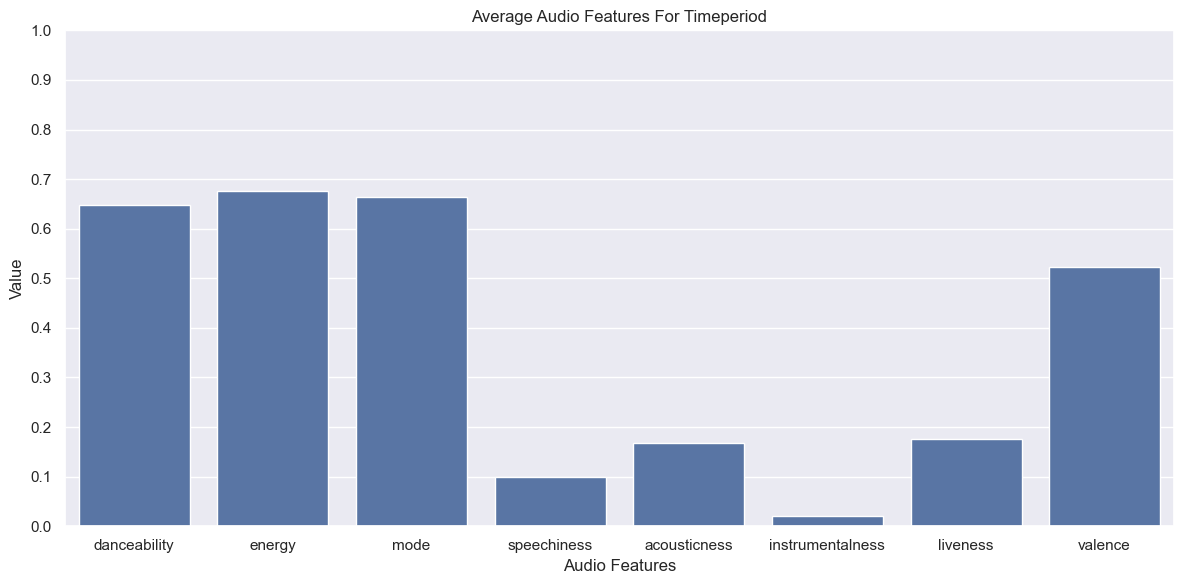

['Average beat per minute: 122',
 'Average beat per bar: 4',
 'Average decibel: -6',
 '66% of songs are in major',
 '34% of songs are in major',
 'Most songs are in C#/Db']

In [168]:
agg_chart_print(chart_with_audio_features)

#### What was the average audio features for 2024? 

In [169]:
# takes DataFrame and year as arguments, returns DataFrame filtered on year 
def filter_on_year(dataframe, year): 
    filtered_dataframe = dataframe[dataframe['chart_week'].dt.year == year]
    return filtered_dataframe

In [172]:
# filtering on year 2024
last_year_df = filter_on_year(chart_with_audio_features, 2024)

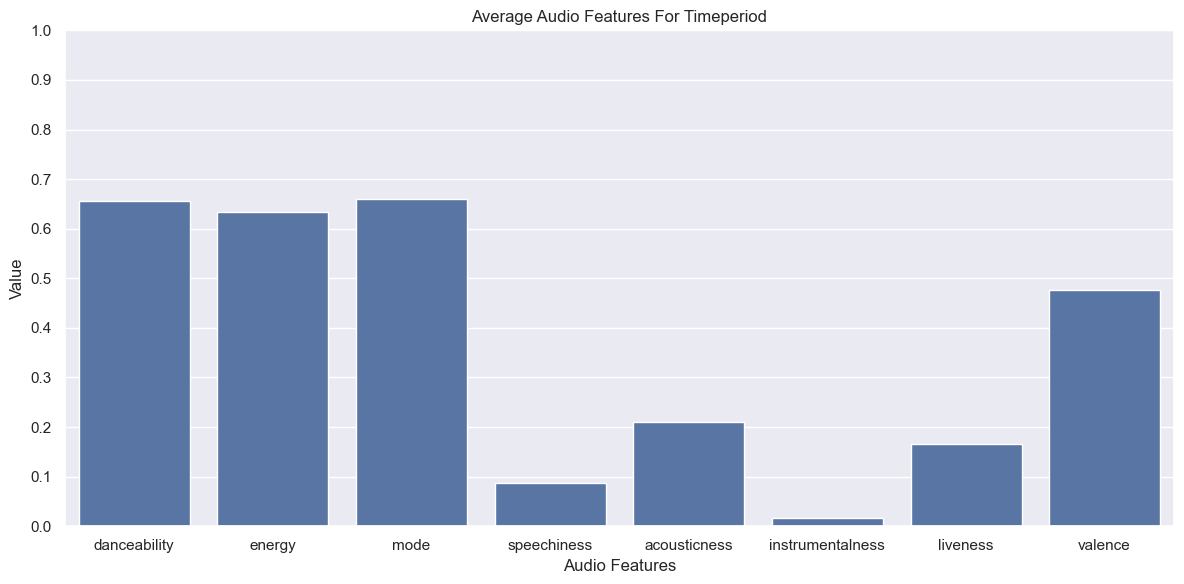

['Average beat per minute: 125',
 'Average beat per bar: 4',
 'Average decibel: -6',
 '66% of songs are in major',
 '34% of songs are in major',
 'Most songs are in C']

In [173]:
# aggregating 2024 chart to get average audio features for 2024
agg_chart_print(last_year_df)

#### What was the average audio features for 2000? 

In [174]:
# filtering on year 2020
first_year_df = filter_on_year(chart_with_audio_features, 2000)

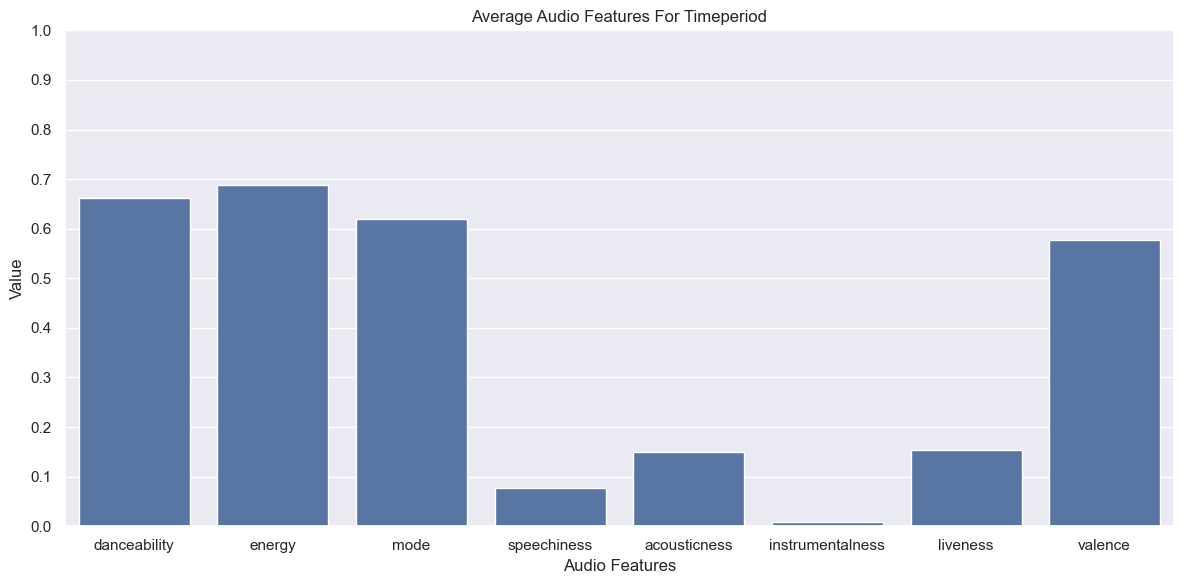

['Average beat per minute: 117',
 'Average beat per bar: 4',
 'Average decibel: -7',
 '62% of songs are in major',
 '38% of songs are in major',
 'Most songs are in G']

In [175]:
# aggregating 2020 chart to get average audio features for 2024
agg_chart_print(first_year_df)

#### Is there a significant difference in the audio features between the years 2000 and 2024?

In [216]:
# takes dataframe, year 1 and year 2 as arguments, returns comparison as barchart and DataFrame 
def agg_chart_print_compare (dataframe, year1, year2):
    
    # filtering on first year
    year1_df = filter_on_year(dataframe, year1)
    # filtering on second year
    year2_df = filter_on_year(dataframe, year2)
    
    # aggregating audio features for chart
    year1_chart_df = agg_audio_features_for_chart(year1_df)
    year2_chart_df = agg_audio_features_for_chart(year2_df)
    
    # adding year column to dataframess for filtering 
    year1_chart_df['filter'] = f'{year1}'
    year2_chart_df['filter'] = f'{year2}'
    
    # combining chart dataframes into one
    combined_chart_df = pd.concat([year1_chart_df, year2_chart_df])
    
    # aggregating audio features for print
    year1_print_df = agg_audio_features_for_print(year1_df)
    year2_print_df = agg_audio_features_for_print(year2_df)
    
    # renaming columns
    year1_print_df.rename(columns={'value': f'values for {year1}'}, inplace=True)
    year2_print_df.rename(columns={'value': f'values for {year2}'}, inplace=True)
    
    # selecting column with year 2 values and combining datafrmes into 1
    year2_values = year2_print_df.iloc[:,1]
    combined_print_df = pd.concat([year1_print_df, year2_values], axis=1)
    
    # plotting first and last year side by side
    sns.catplot(
        data=combined_chart_df,
        x='feature',
        y='value',
        hue='filter',
        kind='bar',
        height=6,
        aspect=2
    )

    # set y axis limit
    plt.ylim(0, 1.0)
    # creating tick range
    ticks = [x/10 for x in range(0, 11)]
    plt.yticks(ticks)

    # adding labels and title
    plt.xlabel('Audio Features')
    plt.ylabel('Value')
    plt.title(f'Audio Features: {year1} VS {year2}')

    plt.show()
    
    return combined_print_df

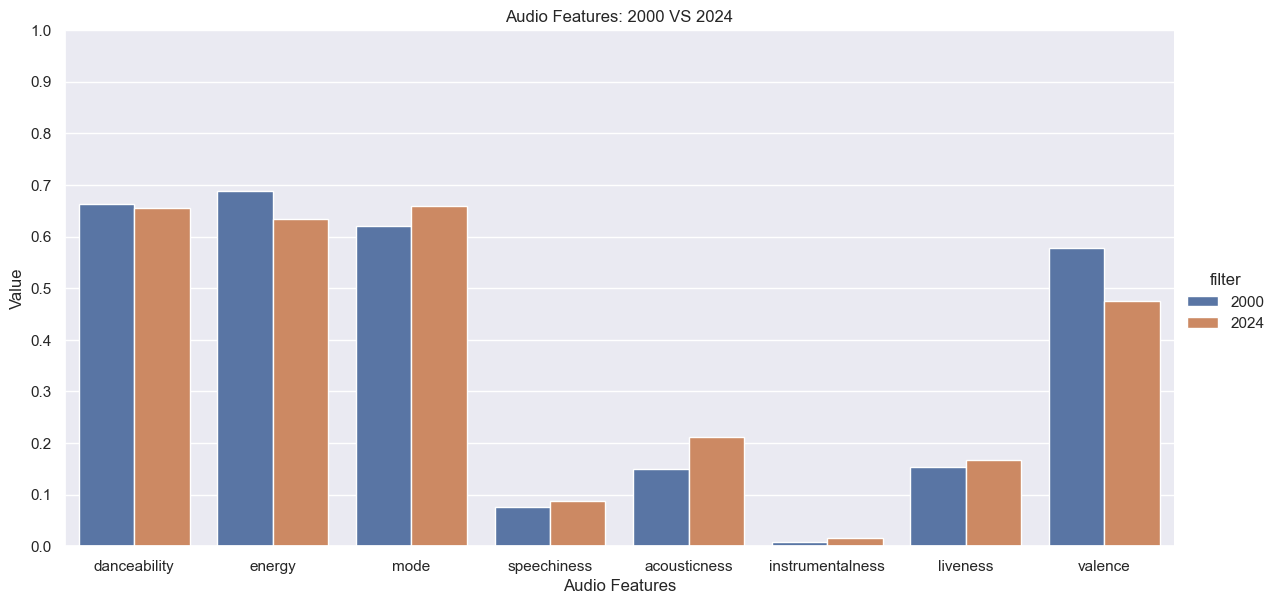

,metric,value year 2000,value year 2024
0,average_bpn,117,125
1,average_beats_per_bar,4,4
2,percentage_of_major,62,66
3,percentage_of_minor,38,34
4,most_requent_key,G,C
5,average_decibels,-7,-6


In [217]:
# aggregating and comparing audio features for 2020 and 2024
combined_print_df = agg_chart_print_compare(chart_with_audio_features, 2000, 2024)
combined_print_df

#### Is there a difference in average audio features between the top 10% and the remaining listings?

In [232]:
# takes DataFrame, start date, date and returns DataFrame filtered on list_positions, and DataFrame excluding list_positions
def filter_on_list_position(df, start_list_position, end_list_position):
    # filter on list_position and add column 'filtered' with value 'filtered'
    filtered_df = df[df['list_position'].between(start_list_position, end_list_position)]
    filtered_df['filter'] = 'selected'
    
    # filter out list_position and add column 'remaining' with value 'remaining'
    remaining_df = df[~df['list_position'].between(start_list_position, end_list_position)]
    remaining_df['filter'] = 'remaining'
    
    return filtered_df, remaining_df

In [233]:
# filtering on list position 1-10 and 11-100
filtered_df, remaining_df = filter_on_list_position(chart_with_audio_features, 1, 10)

/var/folders/dz/cpbtp_bj5clg61h2kc3jgjpc0000gn/T/ipykernel_31137/1827107402.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['filter'] = 'selected'
/var/folders/dz/cpbtp_bj5clg61h2kc3jgjpc0000gn/T/ipykernel_31137/1827107402.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remaining_df['filter'] = 'remaining'


In [234]:
filtered_df

,chart_week,list_position,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,filter
26220,2000-01-01,1,1Yp6SnaxRGguBjcEFarluk,0.692,0.696,9.0,-10.309,0.0,0.0360,0.0860,0.018600,0.0551,0.8840,115.965,4.0,selected
112007,2000-01-01,2,6mwA6YiKDjAUG8kWvRRUPh,0.660,0.347,11.0,-9.114,1.0,0.0300,0.4520,0.000000,0.1310,0.2560,129.747,4.0,selected
93449,2000-01-01,3,5gZEhPrN1VLqTG1nIAXeNK,0.590,0.666,4.0,-4.047,0.0,0.0244,0.1560,0.000000,0.1360,0.0743,104.042,4.0,selected
27156,2000-01-01,4,1ckU1EhAO0Nr73QYw24SWJ,0.770,0.475,7.0,-9.512,1.0,0.1590,0.0561,0.000005,0.0607,0.4730,82.511,4.0,selected
112335,2000-01-01,5,6nozDLxeL0TE4MS9GqYU1v,0.610,0.497,9.0,-9.880,1.0,0.0279,0.3200,0.000061,0.0884,0.7390,85.031,4.0,selected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47328,2024-10-12,6,2plbrEY59IikOBgBGLjaoe,0.521,0.592,6.0,-7.777,0.0,0.0304,0.3080,0.000000,0.1220,0.5350,157.969,3.0,selected
9167,2024-10-12,7,0WbMK4wrZ1wFSty9F7FCgu,0.700,0.582,11.0,-5.960,0.0,0.0356,0.0502,0.000000,0.0881,0.7850,116.712,4.0,selected
114247,2024-10-12,8,6usohdchdzW9oML7VC4Uhk,0.561,0.604,9.0,-4.409,1.0,0.0337,0.1990,0.000019,0.1040,0.2420,159.920,3.0,selected
87080,2024-10-12,9,5G2f63n7IPVPPjfNIGih7Q,0.674,0.907,3.0,-4.086,1.0,0.0640,0.1010,0.000000,0.2970,0.7210,112.964,4.0,selected


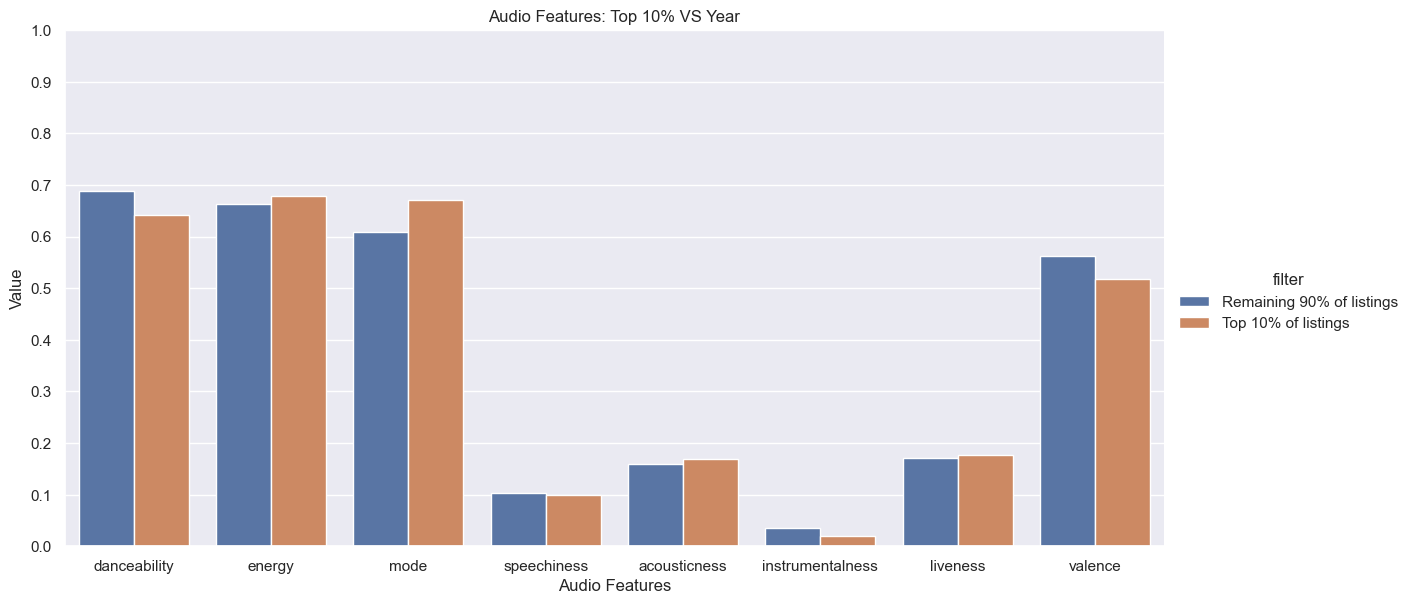

In [215]:
# aggregating audio features
filtered_chart_df = agg_audio_features_for_chart(filtered_df)
remaning_chart_df = agg_audio_features_for_chart(remaining_df)

# adding year column to each dataframes
remaning_chart_df['filter'] = 'Top 10% of listings'
filtered_chart_df['filter'] = 'Remaining 90% of listings'

# combining the dataframes into one 
combined_chart_df = pd.concat([filtered_chart_df, remaning_chart_df])

# plotting top 10% and remaning 90% side by side
sns.catplot(
    data=combined_chart_df,
    x='feature',
    y='value',
    hue='filter',
    kind='bar',
    height=6,
    aspect=2
)

# set y axis limit
plt.ylim(0, 1.0)
# creating tick range
ticks = [x/10 for x in range(0, 11)]
plt.yticks(ticks)

 # adding labels and title
plt.xlabel('Audio Features')
plt.ylabel('Value')
plt.title('Audio Features: Top 10% VS Year')

plt.show()

### How has the average audio features changed over the years? 

#### Aggregating audio features by year

In [238]:
# grouping chart by year and aggregating audio features
chart_aggregated_yearly = chart_with_audio_features.groupby(chart_with_audio_features['chart_week'].dt.year).agg(
    # get average value for audio features (value range from 0-1)
    dancingability=('danceability', 'mean'),
    energy=('energy', 'mean'),
    mode=('mode', 'mean'),
    speechiness=('speechiness', 'mean'),
    acousticness=('acousticness', 'mean'),
    instrumentalness=('instrumentalness', 'mean'),
    liveness=('liveness', 'mean'),
    valence=('valence', 'mean'),
    # get average beats per minute and round
    avg_bpm=('tempo', lambda x: int(round(x.mean()))),
    # get average beats per bar 
    avg_beats_per_bar=('time_signature', 'mean'),
    # get percentage of songs in major/minor and round
    pct_songs_in_major=('mode', lambda x: round((x == 1).mean() * 100)),
    pct_songs_in_minor=('mode', lambda x: round((x == 0).mean() * 100)),
    # get average track key
    avg_song_key=('key', lambda x: int(x.mode().iloc[0]))
).reset_index()

In [240]:
# renamning chart_week and inspecting result
chart_aggregated_yearly = chart_aggregated_yearly.rename(columns={'chart_week': 'year'})
chart_aggregated_yearly.head()

,year,dancingability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,avg_bpm,avg_beats_per_bar,pct_songs_in_major,pct_songs_in_minor,avg_song_key
0,2000,0.662418,0.688801,0.620000,0.076566,0.150113,0.008136,0.153590,0.577940,117,3.994717,62,38,7
1,2001,0.652913,0.682953,0.652149,0.095370,0.155766,0.027780,0.177559,0.587633,116,3.980921,65,35,1
2,2002,0.640161,0.692787,0.636679,0.105083,0.161720,0.014408,0.157900,0.573446,118,3.954729,64,36,2
3,2003,0.635861,0.691305,0.637938,0.105557,0.169402,0.021004,0.178774,0.565988,116,3.949788,64,36,1
4,2004,0.638167,0.696748,0.656923,0.112682,0.165931,0.016464,0.180548,0.560875,120,3.948846,66,34,1


In [242]:
# replacing numerical values with musical notesand inspecting result 
chart_aggregated_yearly['avg_song_key'] = chart_aggregated_yearly['avg_song_key'].astype(str).apply(numeric_to_key)
chart_aggregated_yearly.head()

,year,dancingability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,avg_bpm,avg_beats_per_bar,pct_songs_in_major,pct_songs_in_minor,avg_song_key
0,2000,0.662418,0.688801,0.620000,0.076566,0.150113,0.008136,0.153590,0.577940,117,3.994717,62,38,G
1,2001,0.652913,0.682953,0.652149,0.095370,0.155766,0.027780,0.177559,0.587633,116,3.980921,65,35,C#/Db
2,2002,0.640161,0.692787,0.636679,0.105083,0.161720,0.014408,0.157900,0.573446,118,3.954729,64,36,D
3,2003,0.635861,0.691305,0.637938,0.105557,0.169402,0.021004,0.178774,0.565988,116,3.949788,64,36,C#/Db
4,2004,0.638167,0.696748,0.656923,0.112682,0.165931,0.016464,0.180548,0.560875,120,3.948846,66,34,C#/Db


In [243]:
# replacing numerical values with string and inspecting result 
chart_aggregated_yearly['pct_songs_in_major'] = chart_aggregated_yearly['pct_songs_in_major'].astype(str).apply(numeric_to_percentage)
chart_aggregated_yearly['pct_songs_in_minor'] = chart_aggregated_yearly['pct_songs_in_minor'].astype(str).apply(numeric_to_percentage)
chart_aggregated_yearly.head()

,year,dancingability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,avg_bpm,avg_beats_per_bar,pct_songs_in_major,pct_songs_in_minor,avg_song_key
0,2000,0.662418,0.688801,0.620000,0.076566,0.150113,0.008136,0.153590,0.577940,117,3.994717,62%,38%,G
1,2001,0.652913,0.682953,0.652149,0.095370,0.155766,0.027780,0.177559,0.587633,116,3.980921,65%,35%,C#/Db
2,2002,0.640161,0.692787,0.636679,0.105083,0.161720,0.014408,0.157900,0.573446,118,3.954729,64%,36%,D
3,2003,0.635861,0.691305,0.637938,0.105557,0.169402,0.021004,0.178774,0.565988,116,3.949788,64%,36%,C#/Db
4,2004,0.638167,0.696748,0.656923,0.112682,0.165931,0.016464,0.180548,0.560875,120,3.948846,66%,34%,C#/Db


#### Are there yearly trends in the average audio features?

In [133]:
# getting keys
chart_aggregated_yearly.keys()

Index(['year', 'dancingability', 'energy', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'avg_bpm',
       'avg_beats_per_bar', 'pct_songs_in_major', 'pct_songs_in_minor',
       'avg_song_key'],
      dtype='object')

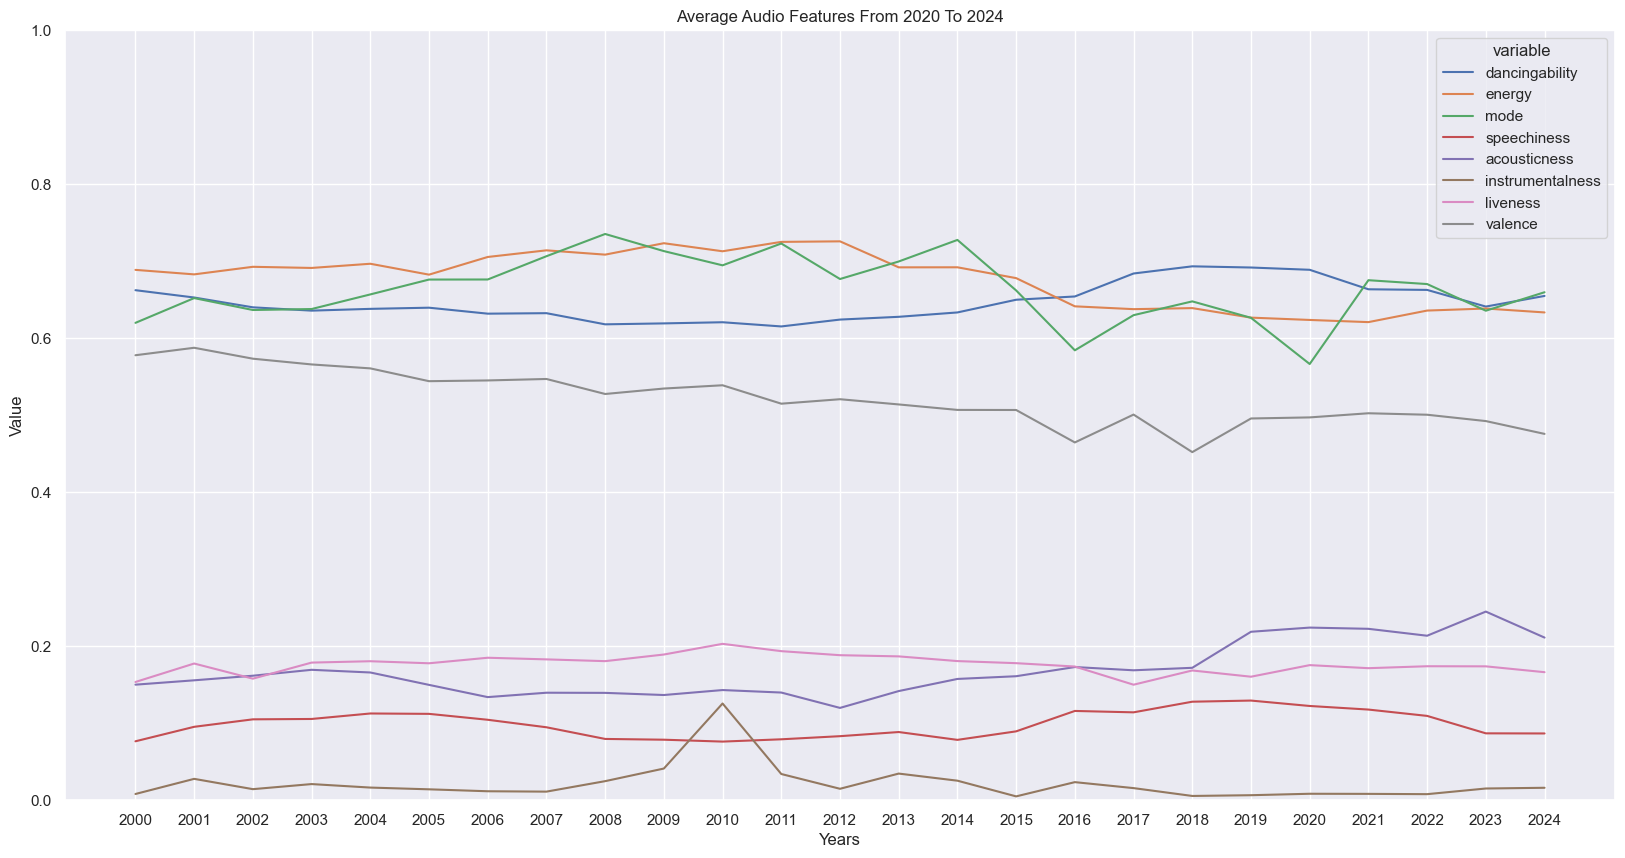

In [134]:
# listing columns to be plotted
columns_to_plot = ['dancingability', 'energy', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

# transforming DataFrame for esier plotting and selecting columns to plot
melted_df = chart_aggregated_yearly.melt(id_vars=['year'], value_vars=columns_to_plot, var_name='variable', value_name='value')

# plotting the data
plt.figure(figsize=(20, 10))
sns.lineplot(data=melted_df, x='year', y='value', hue='variable')

# setting ticks for each year
plt.xticks(ticks=melted_df['year'].unique())

# setting y-axis scale from 0.0 to 1.0
plt.ylim(0.0, 1.0)

# adding labels and title
plt.xlabel('Years')
plt.ylabel('Value')
plt.title('Average Audio Features From 2020 To 2024')

plt.show()

#### Is there a difference yearly trends between the top 10% and the remaining listings?

#### Aggregating audio features by month

In [244]:
# grouping chart by month and aggregating audio features
chart_aggregated_monthly = chart_with_audio_features.groupby(chart_with_audio_features['chart_week'].dt.month).agg(
    # get average value for audio features (value range from 0-1)
    dancingability=('danceability', 'mean'),
    energy=('energy', 'mean'),
    mode=('mode', 'mean'),
    speechiness=('speechiness', 'mean'),
    acousticness=('acousticness', 'mean'),
    instrumentalness=('instrumentalness', 'mean'),
    liveness=('liveness', 'mean'),
    valence=('valence', 'mean'),
    # get average beats per minute and round
    avg_bpm=('tempo', lambda x: int(round(x.mean()))),
    # get average beats per bar 
    avg_beats_per_bar=('time_signature', 'mean'),
    # get percentage of songs in major/minor and round
    pct_songs_in_major=('mode', lambda x: round((x == 1).mean() * 100)),
    pct_songs_in_minor=('mode', lambda x: round((x == 0).mean() * 100)),
    # get average track key
    avg_song_key=('key', lambda x: int(round(x.mode().iloc[0])))
).reset_index()

In [246]:
# renaming 'chart_week' to 'month' and inspecting result
chart_aggregated_monthly = chart_aggregated_monthly.rename(columns={'chart_week': 'month'})
chart_aggregated_monthly.head()

,month,dancingability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,avg_bpm,avg_beats_per_bar,pct_songs_in_major,pct_songs_in_minor,avg_song_key
0,1,0.641747,0.670861,0.660662,0.096984,0.174884,0.024082,0.175564,0.518342,122,3.975983,66,34,1
1,2,0.646147,0.671368,0.659667,0.098353,0.172260,0.021010,0.174277,0.512985,122,3.976228,66,34,1
2,3,0.646699,0.671826,0.660445,0.098849,0.172116,0.019610,0.174870,0.512050,122,3.970246,66,34,1
3,4,0.645555,0.672482,0.657180,0.099380,0.170581,0.019864,0.176825,0.513170,122,3.960508,66,34,1
4,5,0.645926,0.677068,0.659283,0.100758,0.172231,0.023470,0.177892,0.519371,122,3.957721,66,34,1


In [247]:
# convert numerical value to month name
def numeric_to_month(column):
    month_map = {
        "1": "jan", "2": "feb", "3": "mar", "4": "apr",
        "5": "maj", "6": "jun", "7": "jul", "8": "aug",
        "9": "sep", "10": "okt", "11": "nov", "12": "dec"
    }
    return month_map.get(column, column)

In [248]:
# replacing numerical values with month names and inspecting result 
chart_aggregated_monthly['month'] = chart_aggregated_monthly['month'].astype(str).apply(numeric_to_month)
chart_aggregated_monthly.head()

,month,dancingability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,avg_bpm,avg_beats_per_bar,pct_songs_in_major,pct_songs_in_minor,avg_song_key
0,jan,0.641747,0.670861,0.660662,0.096984,0.174884,0.024082,0.175564,0.518342,122,3.975983,66,34,1
1,feb,0.646147,0.671368,0.659667,0.098353,0.172260,0.021010,0.174277,0.512985,122,3.976228,66,34,1
2,mar,0.646699,0.671826,0.660445,0.098849,0.172116,0.019610,0.174870,0.512050,122,3.970246,66,34,1
3,apr,0.645555,0.672482,0.657180,0.099380,0.170581,0.019864,0.176825,0.513170,122,3.960508,66,34,1
4,maj,0.645926,0.677068,0.659283,0.100758,0.172231,0.023470,0.177892,0.519371,122,3.957721,66,34,1


In [249]:
# replacing numerical values with musical notesand inspecting result 
chart_aggregated_monthly['avg_song_key'] = chart_aggregated_monthly['avg_song_key'].astype(str).apply(numeric_to_key)
chart_aggregated_monthly.head()

,month,dancingability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,avg_bpm,avg_beats_per_bar,pct_songs_in_major,pct_songs_in_minor,avg_song_key
0,jan,0.641747,0.670861,0.660662,0.096984,0.174884,0.024082,0.175564,0.518342,122,3.975983,66,34,C#/Db
1,feb,0.646147,0.671368,0.659667,0.098353,0.172260,0.021010,0.174277,0.512985,122,3.976228,66,34,C#/Db
2,mar,0.646699,0.671826,0.660445,0.098849,0.172116,0.019610,0.174870,0.512050,122,3.970246,66,34,C#/Db
3,apr,0.645555,0.672482,0.657180,0.099380,0.170581,0.019864,0.176825,0.513170,122,3.960508,66,34,C#/Db
4,maj,0.645926,0.677068,0.659283,0.100758,0.172231,0.023470,0.177892,0.519371,122,3.957721,66,34,C#/Db


In [250]:
# replacing numerical values with string and inspecting result 
chart_aggregated_monthly['pct_songs_in_major'] = chart_aggregated_monthly['pct_songs_in_major'].astype(str).apply(numeric_to_percentage)
chart_aggregated_monthly['pct_songs_in_minor'] = chart_aggregated_monthly['pct_songs_in_minor'].astype(str).apply(numeric_to_percentage)
chart_aggregated_monthly.head()

,month,dancingability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,avg_bpm,avg_beats_per_bar,pct_songs_in_major,pct_songs_in_minor,avg_song_key
0,jan,0.641747,0.670861,0.660662,0.096984,0.174884,0.024082,0.175564,0.518342,122,3.975983,66%,34%,C#/Db
1,feb,0.646147,0.671368,0.659667,0.098353,0.172260,0.021010,0.174277,0.512985,122,3.976228,66%,34%,C#/Db
2,mar,0.646699,0.671826,0.660445,0.098849,0.172116,0.019610,0.174870,0.512050,122,3.970246,66%,34%,C#/Db
3,apr,0.645555,0.672482,0.657180,0.099380,0.170581,0.019864,0.176825,0.513170,122,3.960508,66%,34%,C#/Db
4,maj,0.645926,0.677068,0.659283,0.100758,0.172231,0.023470,0.177892,0.519371,122,3.957721,66%,34%,C#/Db


#### Are there seasonal trends in the average audio features?

In [135]:
# getting keys 
chart_aggregated_monthly.keys()

Index(['month', 'dancingability', 'energy', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'avg_bpm',
       'avg_beats_per_bar', 'pct_songs_in_major', 'pct_songs_in_minor',
       'avg_song_key'],
      dtype='object')

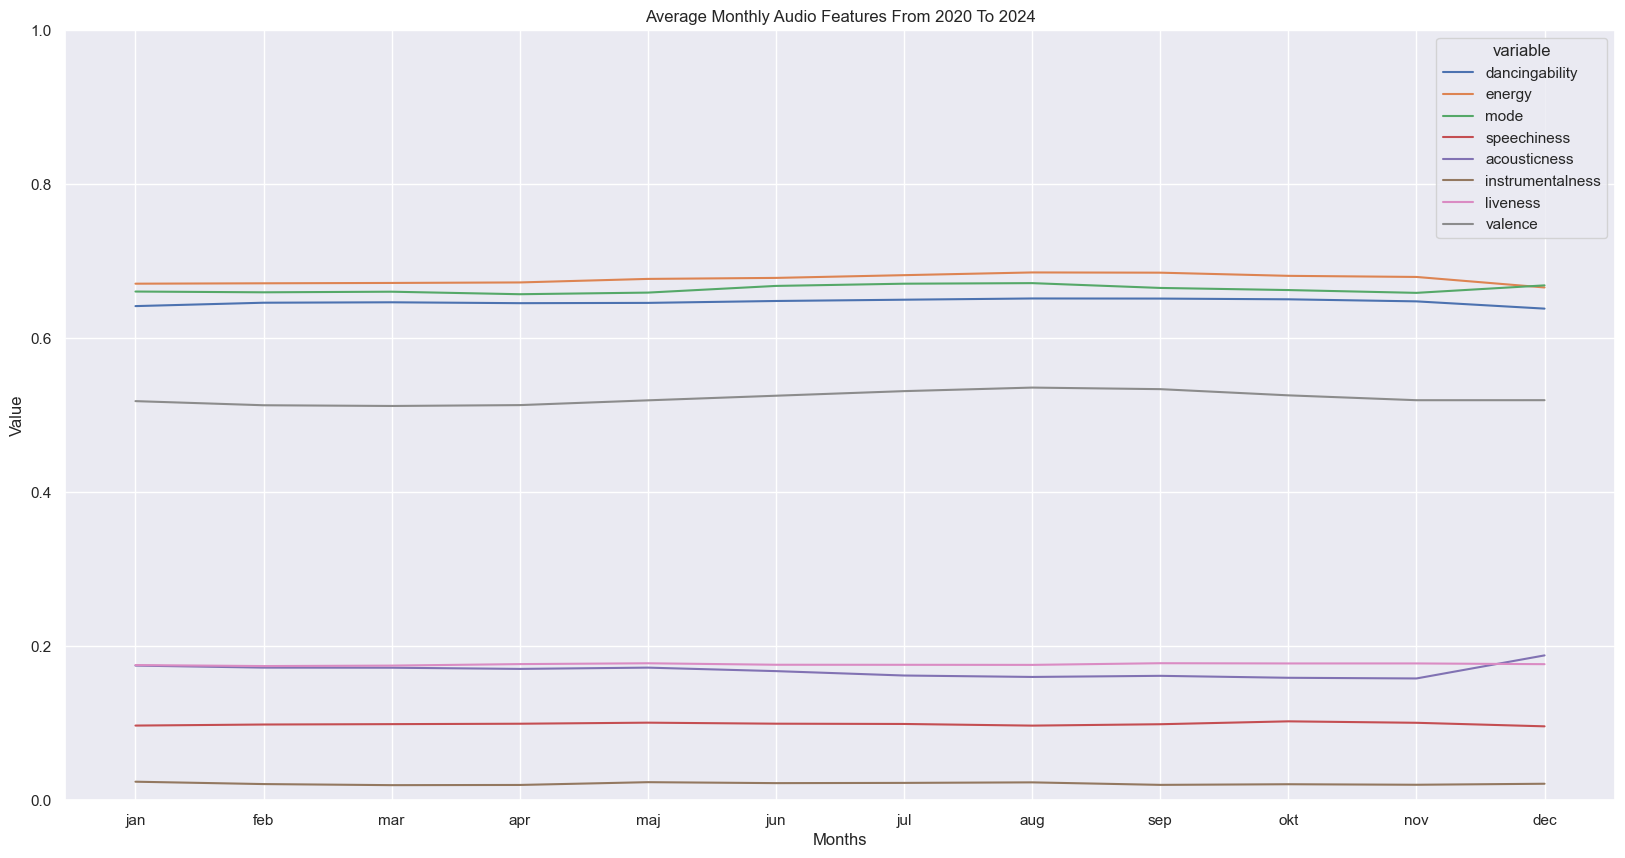

In [136]:
# listing columns to be plotted
columns_to_plot = ['dancingability', 'energy', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

# transforming DataFrame for esier plotting and selecting columns to plot
melted_df = chart_aggregated_monthly.melt(id_vars=['month'], value_vars=columns_to_plot, var_name='variable', value_name='value')

# plotting the data
plt.figure(figsize=(20, 10))
sns.lineplot(data=melted_df, x='month', y='value', hue='variable')

# setting ticks for each month
months_order = ['jan', 'feb', 'mar', 'apr', 'maj', 'jun', 'jul', 'aug', 'sep', 'okt', 'nov', 'dec']
plt.xticks(ticks=months_order, labels=months_order)

# setting y-axis scale from 0.0 to 1.0
plt.ylim(0.0, 1.0)

# adding labels and title
plt.xlabel('Months')
plt.ylabel('Value')
plt.title('Average Monthly Audio Features From 2020 To 2024')

plt.show()

###  Is there a correlation between artists and their chart placements?

#### Joining charts with artists 

In [257]:
# insoecting chart_positions
chart_positions

,chart_week,list_position,track_id
0,2021-07-10,42,000TJlEJQ3nafsm1hBWpoj
1,2003-07-19,60,003FTlCpBTM4eSqYSWPv4H
2,2003-07-26,60,003FTlCpBTM4eSqYSWPv4H
3,2003-08-02,64,003FTlCpBTM4eSqYSWPv4H
4,2003-07-12,66,003FTlCpBTM4eSqYSWPv4H
...,...,...,...
129300,2004-04-17,74,7zywdG4ysfC5XNBzjQAo2o
129301,2004-08-07,80,7zywdG4ysfC5XNBzjQAo2o
129302,2004-08-14,81,7zywdG4ysfC5XNBzjQAo2o
129303,2004-08-21,82,7zywdG4ysfC5XNBzjQAo2o


In [258]:
# inspecting tracks_artists_mapping
tracks_artists_mapping

,artist_id,track_id
0,artist_id,track_id
1,00FQb4jTyendYWaN8pK0wa,4zmKGsrXjLmljb5fTaBTot
2,00FQb4jTyendYWaN8pK0wa,6GGtHZgBycCgGBUhZo81xe
3,00FQb4jTyendYWaN8pK0wa,22DH8NChecsgPxDjA4pqer
4,00FQb4jTyendYWaN8pK0wa,7JVNRVPeXFAOdMrxOHNjVv
...,...,...
15043,7z5WFjZAIYejWy0NI5lv4T,0vzSAyinyA619ZbrOaAi04
15044,7zICaxnDB9ZprDSiFpvbbW,1mtUwv8L4nhMRfbP2pa36V
15045,7zICaxnDB9ZprDSiFpvbbW,0YHI5hydPPth6J5UOzdLDX
15046,7zICaxnDB9ZprDSiFpvbbW,5ztSiJBrCxd4Q0s0yc3tAV


In [259]:
# create chart with artist id by inner joining chart_positions with artists on 'track_id'
chart_with_mapping = pd.merge(chart_positions, tracks_artists_mapping, on='track_id', how= 'inner')
chart_with_mapping.head()

,chart_week,list_position,track_id,artist_id
0,2021-07-10,42,000TJlEJQ3nafsm1hBWpoj,45gHcnDnMC15sgx3VL7ROG
1,2021-07-10,42,000TJlEJQ3nafsm1hBWpoj,4V8LLVI7PbaPR0K2TGSxFF
2,2003-07-19,60,003FTlCpBTM4eSqYSWPv4H,3vAaWhdBR38Q02ohXqaNHT
3,2003-07-26,60,003FTlCpBTM4eSqYSWPv4H,3vAaWhdBR38Q02ohXqaNHT
4,2003-08-02,64,003FTlCpBTM4eSqYSWPv4H,3vAaWhdBR38Q02ohXqaNHT


In [260]:
# createing chart with artist information by inner joining chart_with_mapping with artists on 'artist_id'
chart_with_artists = pd.merge(chart_with_mapping, artists, on='artist_id', how= 'inner')
chart_with_artists.head()

,chart_week,list_position,track_id,artist_id,name,popularity,followers
0,2021-07-10,42,000TJlEJQ3nafsm1hBWpoj,45gHcnDnMC15sgx3VL7ROG,42 Dugg,72,1234936
1,2021-07-10,42,000TJlEJQ3nafsm1hBWpoj,4V8LLVI7PbaPR0K2TGSxFF,"Tyler, The Creator",87,16512648
2,2003-07-19,60,003FTlCpBTM4eSqYSWPv4H,3vAaWhdBR38Q02ohXqaNHT,The All-American Rejects,68,2692470
3,2003-07-26,60,003FTlCpBTM4eSqYSWPv4H,3vAaWhdBR38Q02ohXqaNHT,The All-American Rejects,68,2692470
4,2003-08-02,64,003FTlCpBTM4eSqYSWPv4H,3vAaWhdBR38Q02ohXqaNHT,The All-American Rejects,68,2692470


In [261]:
# dropping uncenssary columns and inspecting result
chart_with_artists.drop(['chart_week', 'track_id', 'artist_id'], axis=1, inplace=True)
chart_with_artists.head()

,list_position,name,popularity,followers
0,42,42 Dugg,72,1234936
1,42,"Tyler, The Creator",87,16512648
2,60,The All-American Rejects,68,2692470
3,60,The All-American Rejects,68,2692470
4,64,The All-American Rejects,68,2692470


#### Is there a correlation between Spotifys popularity score and their chart placements?

In [137]:
# inspecting max and min values for popularity 
chart_with_artists['popularity'].describe()

count     175529.0
mean     71.954122
std      17.288221
min            0.0
25%           64.0
50%           75.0
75%           84.0
max          100.0
Name: popularity, dtype: Float64

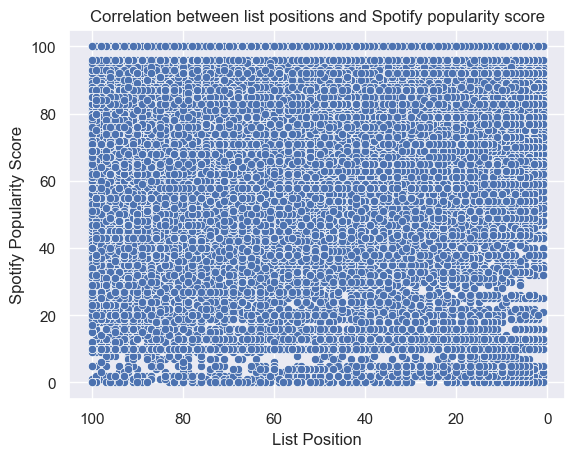

In [138]:
sns.scatterplot(data=chart_with_artists, x='list_position', y='popularity')

plt.xlabel('List Position')
plt.ylabel('Spotify Popularity Score')
plt.title('Correlation between list positions and Spotify popularity score')

# invert x-axis to show 1 as the best score
plt.gca().invert_xaxis()

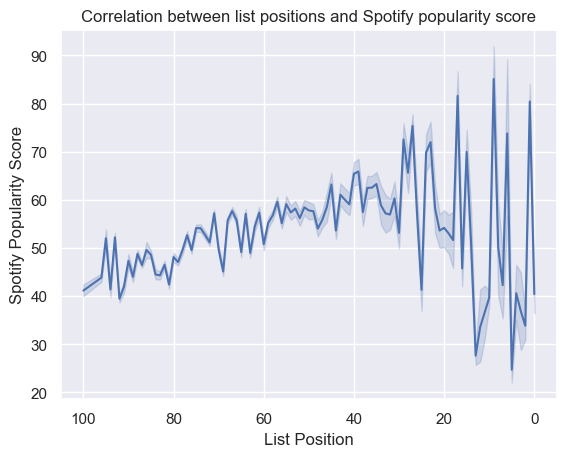

In [139]:
# visulizing the correlation between popularity and list position
sns.lineplot(data=chart_with_artists, x='popularity', y='list_position')

plt.xlabel('List Position')
plt.ylabel('Spotify Popularity Score')
plt.title('Correlation between list positions and Spotify popularity score')

# invert x-axis to show 1 as the best score
plt.gca().invert_xaxis()

#### Is there a correlation between artists Spotify followers and their chart placements?

In [140]:
# inspecting max and min values for followers 
chart_with_artists['followers'].describe()

count           175529.0
mean     14362794.946282
std      24582130.146376
min                  5.0
25%            1156620.0
50%            4549371.0
75%           14039606.0
max          123544806.0
Name: followers, dtype: Float64

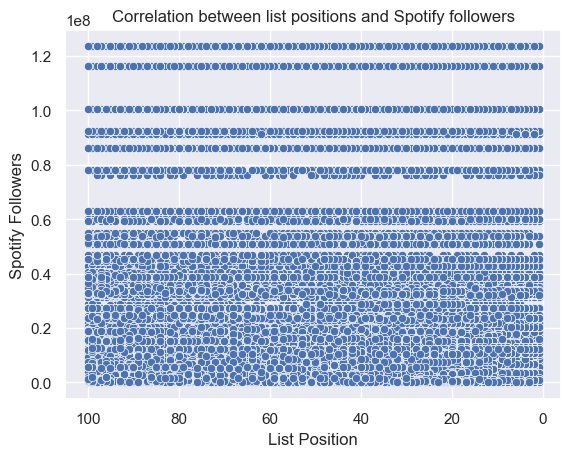

In [141]:
sns.scatterplot(data=chart_with_artists, x='list_position', y='followers')

plt.xlabel('List Position')
plt.ylabel('Spotify Followers')
plt.title('Correlation between list positions and Spotify followers')

# invert x-axis to show 1 as the best score
plt.gca().invert_xaxis()

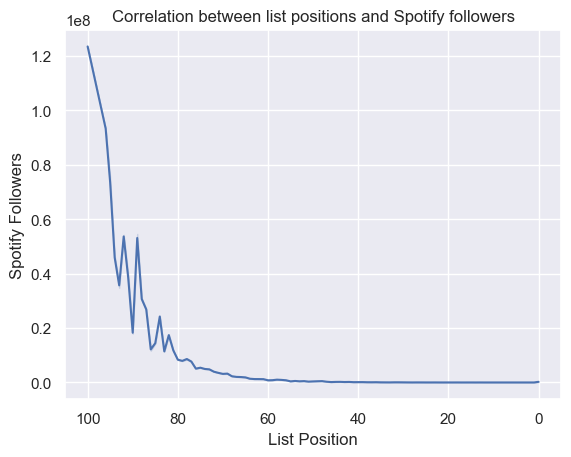

In [142]:
# visulizing the correlation between popularity and list position
sns.lineplot(data=chart_with_artists, x='popularity', y='followers')

plt.xlabel('List Position')
plt.ylabel('Spotify Followers')
plt.title('Correlation between list positions and Spotify followers')

# invert x-axis to show 1 as the best score
plt.gca().invert_xaxis()